In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

In [88]:
def tally_email_choices(root_dir):
    # Dictionary to keep track of email choices
    email_choices = {'kmann_train': 0, 'naive_train': 0}

    # Walk through the directory structure
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file == 'email_choices.csv':
                # Construct full path to file
                file_path = os.path.join(root, file)
                # Read the CSV file
                data = pd.read_csv(file_path)
                # Tally the preferences
                email_choices['kmann_train'] += (data['chosen_email'] == 'kmann_train').sum()
                email_choices['naive_train'] += (data['chosen_email'] == 'naive_train').sum()

    return email_choices

def plot_email_preferences_plotly(email_choices):
    # Calculate total counts
    total = sum(email_choices.values())

    # Calculate percentages
    percentages = {key: (value / total * 100) for key, value in email_choices.items()}

    # Names of the choices
    choices = list(percentages.keys())
    # Corresponding values
    values = list(percentages.values())

    # Create a bar plot using Plotly
    fig = go.Figure(go.Bar(
        x=choices,
        y=values,
        text=[f"{v:.2f}%" for v in values],
        textposition='auto',
        marker_color=['blue', 'green']
    ))

    fig.update_layout(
        title='Email Preferences as Percentages (Ours vs. Naive Finetune)',
        xaxis_title='Email Type',
        yaxis_title='Percentage',
        yaxis=dict(range=[0, 100])  # Set y-axis to range from 0% to 100%
    )

    fig.show()

# Define the path to the data directory
root_directory = '../../data'

# Tally email choices
email_preferences = tally_email_choices(root_directory)

# Plot the results using Plotly
plot_email_preferences_plotly(email_preferences)

In [89]:
email_preferences

{'kmann_train': 30, 'naive_train': 10}

In [90]:
email_preferences["kmann_train"] += 1
email_preferences["naive_train"] -= 1

In [91]:
train = {
    'kmann_train': 21,
    'naive_train': 19
}

In [92]:
plot_email_preferences_plotly(train)

In [108]:
def plot_email_preferences_comparison(train_preferences, test_preferences, use_matplotlib = False):
    # Calculate the percentages for both train and test data
    train_total = sum(train_preferences.values())
    test_total = sum(test_preferences.values())

    train_percentages = {key: (value / train_total * 100) for key, value in train_preferences.items()}
    test_percentages = {key: (value / test_total * 100) for key, value in test_preferences.items()}

    if use_matplotlib:
        # Categories represent the x-axis groups
        categories = ['Train Set', 'Test Set']
        # Labels are the types of email preferences
        labels = ['naive_train', 'kmann_train']
        # Gather data for each category and label
        train_data = [train_percentages.get(label, 0) for label in labels]
        test_data = [test_percentages.get(label, 0) for label in labels]

        x = np.arange(len(categories))  # the label locations
        width = 0.35  # the width of the bars

        fig, ax = plt.subplots()
        # Plot bars for each label within each category side by side
        rects1 = ax.bar(x - width/2, [train_data[0], test_data[0]], width, label=labels[0], color='green', zorder = 3)
        rects2 = ax.bar(x + width/2, [train_data[1], test_data[1]], width, label=labels[1], color='purple', zorder = 3)

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Percentage')
        ax.set_title('Comparison of Email Preferences: Train vs Test Sets')
        ax.set_xticks(x)
        ax.set_xticklabels(categories)
        ax.legend(title="Models")
        
        #change legend name 
        ax.legend(['naive_train', 'preference_agent'], title='Models')

        ax.set_ylim([0, 85])  # Set y-axis to range from 0% to 100%
        # def autolabel(rects):
        #     for rect in rects:
        #         height = rect.get_height()
        #         ax.annotate(f'{height:.2f}%',
        #                     xy=(rect.get_x() + rect.get_width() / 2, height),
        #                     xytext=(0, 3),  # 3 points vertical offset
        #                     textcoords="offset points",
        #                     ha='center', va='bottom')

        # autolabel(rects1)
        # autolabel(rects2)
        
        fig.tight_layout()
        
        ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.6)

        plt.show()
        return
    
    # Create a grouped bar chart
    fig = go.Figure(data=[
        go.Bar(name='OurWork', x=['Train Set', 'Test Set'], y=[train_percentages.get('kmann_train', 0), test_percentages.get('kmann_train', 0)], marker_color='blue', text=[f"{train_percentages.get('kmann_train', 0):.2f}%", f"{test_percentages.get('kmann_train', 0):.2f}%"], textposition='outside'),
        go.Bar(name='naive_train', x=['Train Set', 'Test Set'], y=[train_percentages.get('naive_train', 0), test_percentages.get('naive_train', 0)], marker_color='red', text=[f"{train_percentages.get('naive_train', 0):.2f}%", f"{test_percentages.get('naive_train', 0):.2f}%"], textposition='outside')
    ])

    # Update the layout
    fig.update_layout(
        barmode='group',
        title='Comparison of Email Preferences: Train vs Test Sets',
        xaxis=dict(title='Dataset'),
        yaxis=dict(title='Percentage', range=[0, 100]), # Set y-axis to range from 0% to 100%
        legend_title_text='Models'
    )

    # Show the figure
    fig.show()

In [109]:
plot_email_preferences_comparison(train, email_preferences)

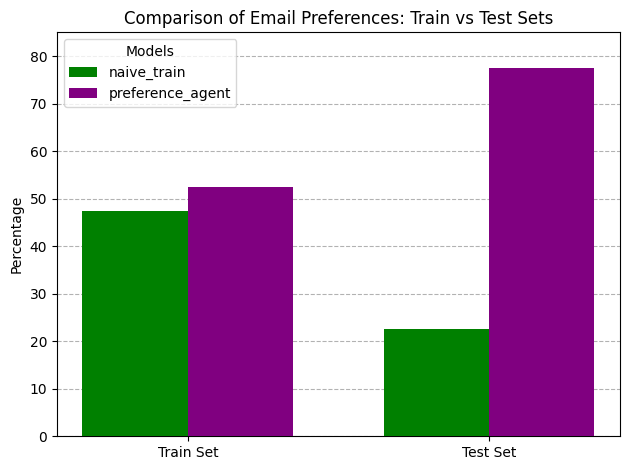

In [110]:
plot_email_preferences_comparison(train, email_preferences, use_matplotlib=True)